In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# S&P 500 Stock Data - Comprehensive EDA

This notebook performs exploratory data analysis on S&P 500 stock data from 1980 to 2022.

## Analysis Overview:
1. Load and examine all stock CSVs
2. Identify oldest and youngest stocks
3. Analyze company count over time
4. Create combined S&P 500 dataset
5. Generate ticker to company name mapping
6. Perform various EDA visualizations

## Step 1: Load All Stock Data

In [4]:
# Define path to sp500 folder
sp500_path = Path(r'sp500')

# Get all CSV files
csv_files = list(sp500_path.glob('*.csv'))
print(f"Total number of CSV files (stocks): {len(csv_files)}")

# Dictionary to store stock info
stock_info = {}

# Load data and extract key information
print("\nLoading stock data...")
for csv_file in csv_files:
    ticker = csv_file.stem  # Get filename without extension
    try:
        df = pd.read_csv(csv_file)
        df['Date'] = pd.to_datetime(df['Date'])
        
        stock_info[ticker] = {
            'start_date': df['Date'].min(),
            'end_date': df['Date'].max(),
            'num_records': len(df),
            'data': df
        }
    except Exception as e:
        print(f"Error loading {ticker}: {e}")

print(f"\nSuccessfully loaded {len(stock_info)} stocks")
print(f"Date range: {min(info['start_date'] for info in stock_info.values())} to {max(info['end_date'] for info in stock_info.values())}")

Total number of CSV files (stocks): 503

Loading stock data...

Successfully loaded 503 stocks
Date range: 1962-01-02 00:00:00 to 2022-07-12 00:00:00


## Step 2: Analyze Oldest and Youngest Stocks

In [6]:
# Create DataFrame with stock start dates
start_dates_df = pd.DataFrame([
    {'Ticker': ticker, 'Start_Date': info['start_date'], 'End_Date': info['end_date'], 'Years': (info['end_date'] - info['start_date']).days / 365.25}
    for ticker, info in stock_info.items()
]).sort_values('Start_Date')

# Find oldest and youngest stocks
oldest_stocks = start_dates_df.head(10)
youngest_stocks = start_dates_df.tail(10)

print("=" * 60)
print("TOP 10 OLDEST STOCKS (Earliest Start Date)")
print("=" * 60)
print(oldest_stocks[['Ticker', 'Start_Date', 'Years']].to_string(index=False))

print("\n" + "=" * 60)
print("TOP 10 YOUNGEST STOCKS (Latest Start Date)")
print("=" * 60)
print(youngest_stocks[['Ticker', 'Start_Date', 'Years']].to_string(index=False))

print(f"\n\nOldest stock: {oldest_stocks.iloc[0]['Ticker']} starting from {oldest_stocks.iloc[0]['Start_Date'].strftime('%Y-%m-%d')}")
print(f"Youngest stock: {youngest_stocks.iloc[-1]['Ticker']} starting from {youngest_stocks.iloc[-1]['Start_Date'].strftime('%Y-%m-%d')}")

TOP 10 OLDEST STOCKS (Earliest Start Date)
Ticker Start_Date    Years
    PG 1962-01-02 60.52293
   CNP 1962-01-02 60.52293
   CVX 1962-01-02 60.52293
   CAT 1962-01-02 60.52293
   DIS 1962-01-02 60.52293
   DTE 1962-01-02 60.52293
    ED 1962-01-02 60.52293
    BA 1962-01-02 60.52293
    GE 1962-01-02 60.52293
   HON 1962-01-02 60.52293

TOP 10 YOUNGEST STOCKS (Latest Start Date)
Ticker Start_Date    Years
  CDAY 2018-04-26 4.210815
  MRNA 2018-12-07 3.594798
  FOXA 2019-03-12 3.334702
   FOX 2019-03-13 3.331964
   DOW 2019-03-20 3.312799
  CTVA 2019-05-24 3.134839
  CARR 2020-03-19 2.313484
  OTIS 2020-03-19 2.313484
   OGN 2021-05-14 1.160849
   CEG 2022-01-19 0.476386


Oldest stock: PG starting from 1962-01-02
Youngest stock: CEG starting from 2022-01-19


## Step 3: Visualize Company Count Over Time

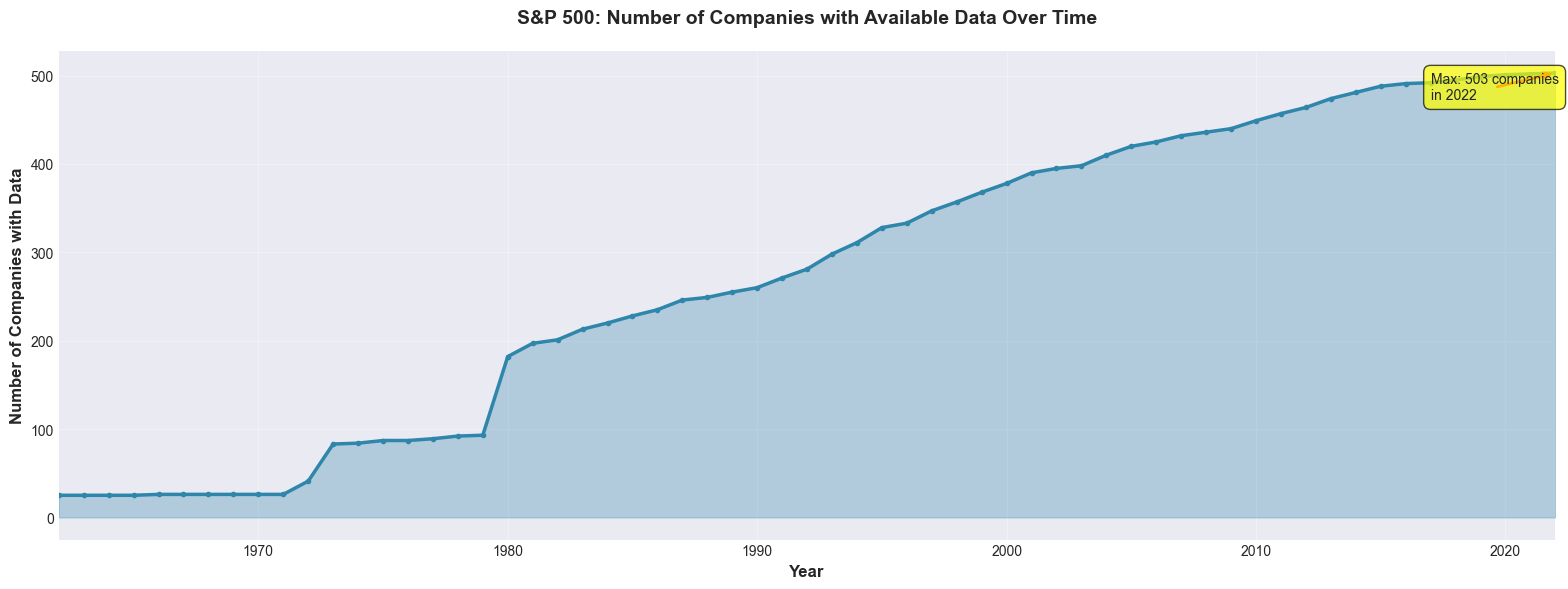

Year with maximum companies: 2022 with 503 companies


In [7]:
# Count companies available for each year
year_counts = {}
min_year = start_dates_df['Start_Date'].min().year
max_year = start_dates_df['End_Date'].max().year

for year in range(min_year, max_year + 1):
    count = 0
    for _, row in start_dates_df.iterrows():
        if row['Start_Date'].year <= year <= row['End_Date'].year:
            count += 1
    year_counts[year] = count

# Create DataFrame
year_counts_df = pd.DataFrame(list(year_counts.items()), columns=['Year', 'Company_Count'])

# Plot 1: Number of companies vs year
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(year_counts_df['Year'], year_counts_df['Company_Count'], linewidth=2.5, color='#2E86AB', marker='o', markersize=3)
ax.fill_between(year_counts_df['Year'], year_counts_df['Company_Count'], alpha=0.3, color='#2E86AB')
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Companies with Data', fontsize=12, fontweight='bold')
ax.set_title('S&P 500: Number of Companies with Available Data Over Time', fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)
ax.set_xlim(min_year, max_year)

# Add annotation for max
max_companies_year = year_counts_df.loc[year_counts_df['Company_Count'].idxmax()]
ax.annotate(f'Max: {int(max_companies_year["Company_Count"])} companies\nin {int(max_companies_year["Year"])}',
            xy=(max_companies_year['Year'], max_companies_year['Company_Count']),
            xytext=(max_companies_year['Year']-5, max_companies_year['Company_Count']-30),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=10, bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.savefig('companies_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Year with maximum companies: {int(max_companies_year['Year'])} with {int(max_companies_year['Company_Count'])} companies")

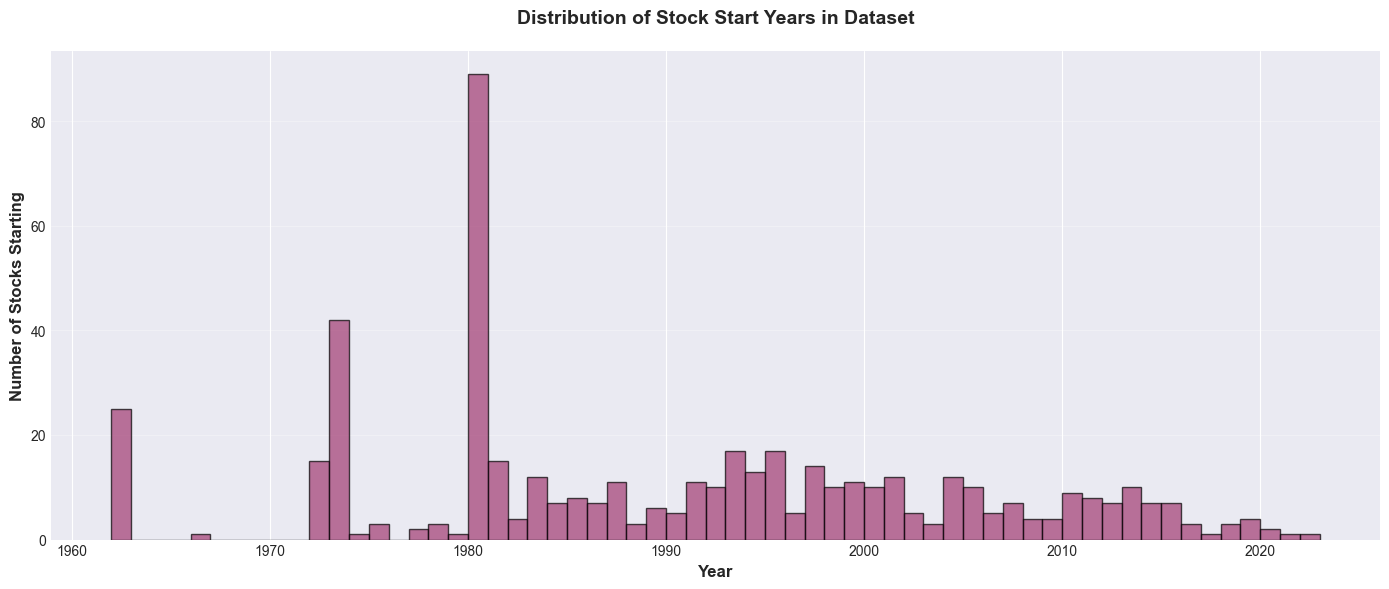


Total unique stocks in dataset: 503


In [8]:
# Plot 2: Distribution of stock start years
fig, ax = plt.subplots(figsize=(14, 6))
start_years = start_dates_df['Start_Date'].dt.year
ax.hist(start_years, bins=range(min_year, max_year+2), edgecolor='black', alpha=0.7, color='#A23B72')
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Stocks Starting', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Stock Start Years in Dataset', fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('stock_start_years_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nTotal unique stocks in dataset: {len(start_dates_df)}")

## Step 4: Plot Oldest vs Youngest Stocks Price Comparison

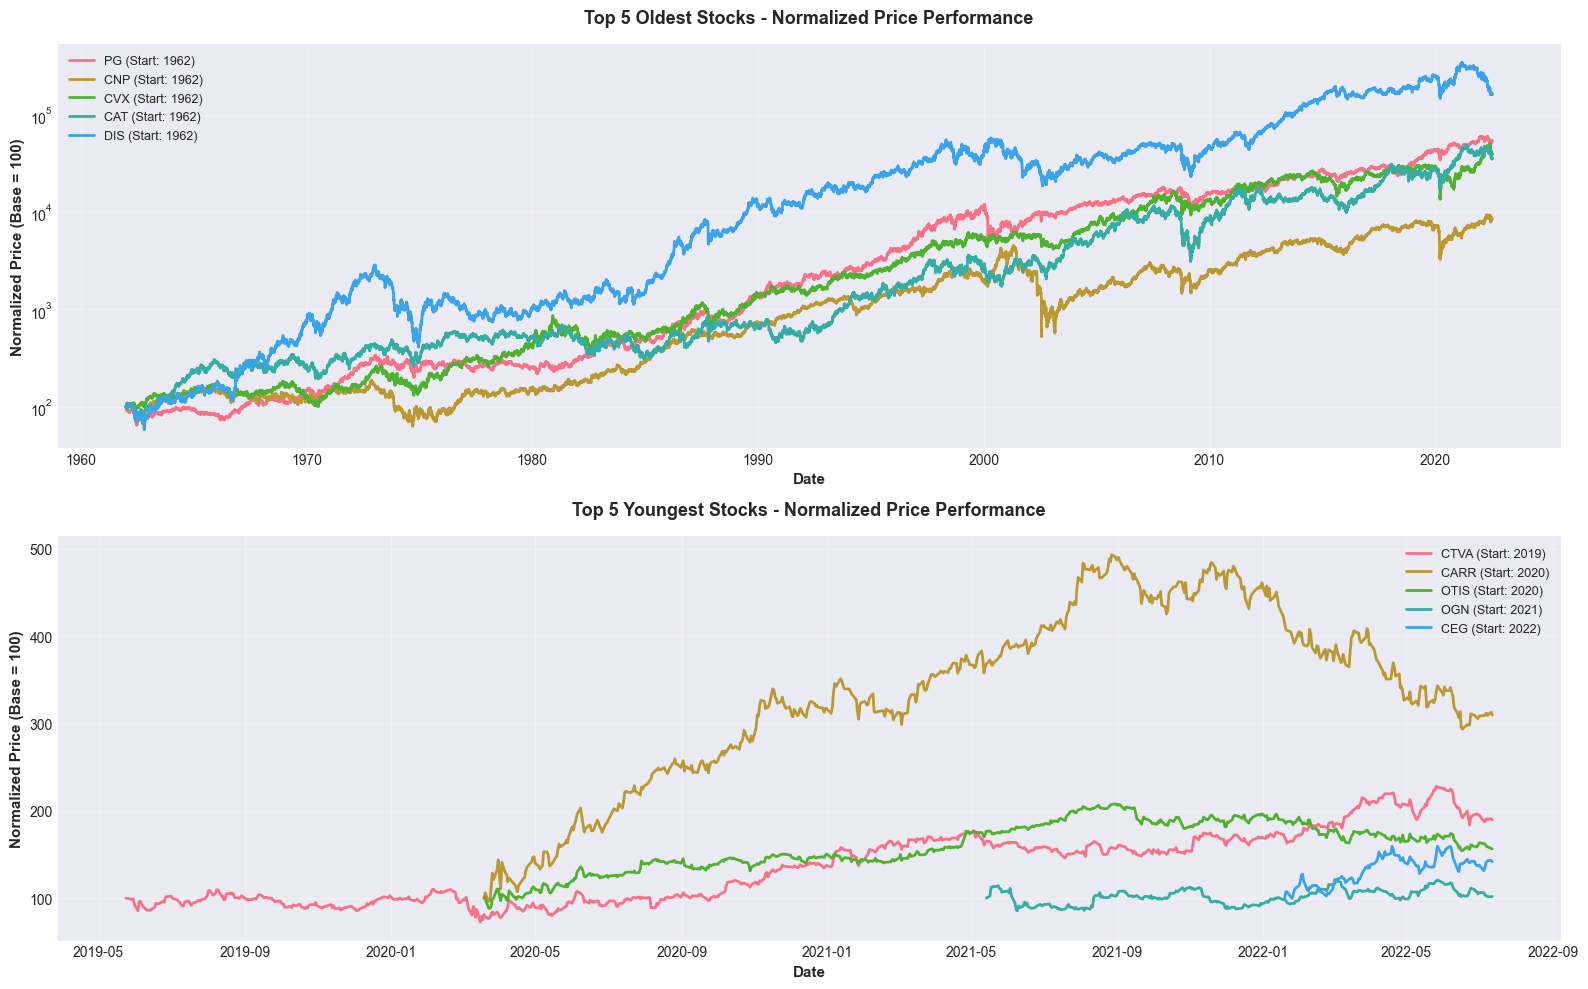

In [9]:
# Plot top 5 oldest and top 5 youngest stocks
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# Plot oldest stocks
for i, row in oldest_stocks.head(5).iterrows():
    ticker = row['Ticker']
    df = stock_info[ticker]['data']
    # Normalize price to start at 100
    normalized_close = (df['Close'] / df['Close'].iloc[0]) * 100
    ax1.plot(df['Date'], normalized_close, label=f"{ticker} (Start: {row['Start_Date'].year})", linewidth=2)

ax1.set_xlabel('Date', fontsize=11, fontweight='bold')
ax1.set_ylabel('Normalized Price (Base = 100)', fontsize=11, fontweight='bold')
ax1.set_title('Top 5 Oldest Stocks - Normalized Price Performance', fontsize=13, fontweight='bold', pad=15)
ax1.legend(loc='best', fontsize=9)
ax1.grid(True, alpha=0.3)
ax1.set_yscale('log')

# Plot youngest stocks
for i, row in youngest_stocks.tail(5).iterrows():
    ticker = row['Ticker']
    df = stock_info[ticker]['data']
    # Normalize price to start at 100
    normalized_close = (df['Close'] / df['Close'].iloc[0]) * 100
    ax2.plot(df['Date'], normalized_close, label=f"{ticker} (Start: {row['Start_Date'].year})", linewidth=2)

ax2.set_xlabel('Date', fontsize=11, fontweight='bold')
ax2.set_ylabel('Normalized Price (Base = 100)', fontsize=11, fontweight='bold')
ax2.set_title('Top 5 Youngest Stocks - Normalized Price Performance', fontsize=13, fontweight='bold', pad=15)
ax2.legend(loc='best', fontsize=9)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('oldest_vs_youngest_stocks.png', dpi=300, bbox_inches='tight')
plt.show()

## Step 5: Find the Date When All 500 Companies Have Data

In [10]:
# Find the date when we have data for all stocks (the youngest stock's start date)
complete_data_start = start_dates_df['Start_Date'].max()
print(f"Date when all {len(stock_info)} stocks have data: {complete_data_start.strftime('%Y-%m-%d')}")
print(f"This is the start date of the youngest stock: {youngest_stocks.iloc[-1]['Ticker']}")

# Count how many stocks we have at this date
stocks_at_complete_date = sum(1 for info in stock_info.values() if info['start_date'] <= complete_data_start <= info['end_date'])
print(f"\nNumber of stocks with data from {complete_data_start.strftime('%Y-%m-%d')} onwards: {stocks_at_complete_date}")

# Verify the data availability
common_end_date = start_dates_df['End_Date'].min()
print(f"Common end date for all stocks: {common_end_date.strftime('%Y-%m-%d')}")
print(f"\nComplete dataset period: {complete_data_start.strftime('%Y-%m-%d')} to {common_end_date.strftime('%Y-%m-%d')}")

Date when all 503 stocks have data: 2022-01-19
This is the start date of the youngest stock: CEG

Number of stocks with data from 2022-01-19 onwards: 503
Common end date for all stocks: 2022-07-12

Complete dataset period: 2022-01-19 to 2022-07-12


## Step 6: Create Combined S&P 500 Dataset

In [11]:
# Create combined dataset from the complete data start date
print("Creating combined S&P 500 dataset...")
combined_data = []

for ticker, info in stock_info.items():
    df = info['data'].copy()
    # Filter data from complete_data_start to common_end_date
    df = df[(df['Date'] >= complete_data_start) & (df['Date'] <= common_end_date)]
    
    if len(df) > 0:
        df['Ticker'] = ticker
        combined_data.append(df)

# Combine all dataframes
sp500_combined = pd.concat(combined_data, ignore_index=True)

# Reorder columns
sp500_combined = sp500_combined[['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']]

# Sort by date and ticker
sp500_combined = sp500_combined.sort_values(['Date', 'Ticker']).reset_index(drop=True)

print(f"\nCombined dataset created!")
print(f"Shape: {sp500_combined.shape}")
print(f"Date range: {sp500_combined['Date'].min()} to {sp500_combined['Date'].max()}")
print(f"Number of unique tickers: {sp500_combined['Ticker'].nunique()}")
print(f"Total records: {len(sp500_combined):,}")

# Display sample
print("\nFirst few rows:")
print(sp500_combined.head(10))

print("\nLast few rows:")
print(sp500_combined.tail(10))

Creating combined S&P 500 dataset...

Combined dataset created!
Shape: (60360, 9)
Date range: 2022-01-19 00:00:00 to 2022-07-12 00:00:00
Number of unique tickers: 503
Total records: 60,360

First few rows:
  Ticker       Date        Open        High         Low       Close  \
0      A 2022-01-19  140.201165  143.121408  139.792528  139.961960   
1    AAL 2022-01-19   17.900000   17.910000   17.290001   17.309999   
2    AAP 2022-01-19  235.974328  239.103864  230.384485  230.620667   
3   AAPL 2022-01-19  169.534601  170.611646  165.485718  165.774918   
4   ABBV 2022-01-19  135.260410  136.341221  133.703634  134.070526   
5    ABC 2022-01-19  132.960514  134.381534  131.291046  131.559357   
6   ABMD 2022-01-19  294.190002  303.070007  292.399994  302.019989   
7    ABT 2022-01-19  126.246817  127.073524  125.330471  125.549599   
8    ACN 2022-01-19  349.957970  355.012925  342.480235  342.719513   
9   ADBE 2022-01-19  516.479980  528.919983  515.299988  516.580017   

       Volum

In [12]:
# Save combined dataset
output_filename = 'sp500_combined_complete.csv'
sp500_combined.to_csv(output_filename, index=False)
print(f"\n✓ Combined dataset saved as '{output_filename}' ({sp500_combined.memory_usage(deep=True).sum() / 1024**2:.2f} MB)")


✓ Combined dataset saved as 'sp500_combined_complete.csv' (7.15 MB)


## Step 7: Create Ticker to Company Name Mapping

In [14]:
# Dictionary mapping common tickers to company names
# This is a comprehensive mapping of S&P 500 companies
ticker_to_company = {
    'AAPL': 'Apple Inc.', 'MSFT': 'Microsoft Corporation', 'GOOGL': 'Alphabet Inc. (Class A)',
    'GOOG': 'Alphabet Inc. (Class C)', 'AMZN': 'Amazon.com Inc.', 'NVDA': 'NVIDIA Corporation',
    'META': 'Meta Platforms Inc.', 'TSLA': 'Tesla Inc.', 'BRK-B': 'Berkshire Hathaway Inc.',
    'UNH': 'UnitedHealth Group Incorporated', 'JNJ': 'Johnson & Johnson', 'XOM': 'Exxon Mobil Corporation',
    'JPM': 'JPMorgan Chase & Co.', 'V': 'Visa Inc.', 'PG': 'Procter & Gamble Company',
    'MA': 'Mastercard Incorporated', 'HD': 'Home Depot Inc.', 'CVX': 'Chevron Corporation',
    'LLY': 'Eli Lilly and Company', 'ABBV': 'AbbVie Inc.', 'MRK': 'Merck & Co. Inc.',
    'AVGO': 'Broadcom Inc.', 'PEP': 'PepsiCo Inc.', 'COST': 'Costco Wholesale Corporation',
    'KO': 'Coca-Cola Company', 'WMT': 'Walmart Inc.', 'MCD': 'McDonalds Corporation',
    'CSCO': 'Cisco Systems Inc.', 'TMO': 'Thermo Fisher Scientific Inc.', 'ABT': 'Abbott Laboratories',
    'ACN': 'Accenture plc', 'ADBE': 'Adobe Inc.', 'CRM': 'Salesforce Inc.',
    'NFLX': 'Netflix Inc.', 'DIS': 'Walt Disney Company', 'NKE': 'NIKE Inc.',
    'ORCL': 'Oracle Corporation', 'INTC': 'Intel Corporation', 'AMD': 'Advanced Micro Devices Inc.',
    'QCOM': 'QUALCOMM Incorporated', 'TXN': 'Texas Instruments Incorporated', 'CMCSA': 'Comcast Corporation',
    'PM': 'Philip Morris International Inc.', 'NEE': 'NextEra Energy Inc.', 'HON': 'Honeywell International Inc.',
    'UNP': 'Union Pacific Corporation', 'UPS': 'United Parcel Service Inc.', 'RTX': 'Raytheon Technologies Corporation',
    'LOW': 'Lowes Companies Inc.', 'BA': 'Boeing Company', 'CAT': 'Caterpillar Inc.',
    'GS': 'Goldman Sachs Group Inc.', 'MS': 'Morgan Stanley', 'AXP': 'American Express Company',
    'DE': 'Deere & Company', 'SPGI': 'S&P Global Inc.', 'BLK': 'BlackRock Inc.',
    'AMGN': 'Amgen Inc.', 'GILD': 'Gilead Sciences Inc.', 'MDLZ': 'Mondelez International Inc.',
    'BKNG': 'Booking Holdings Inc.', 'ISRG': 'Intuitive Surgical Inc.', 'ADP': 'Automatic Data Processing Inc.',
    'NOW': 'ServiceNow Inc.', 'TJX': 'TJX Companies Inc.', 'MMM': '3M Company',
    'VRTX': 'Vertex Pharmaceuticals Incorporated', 'CI': 'Cigna Corporation', 'SYK': 'Stryker Corporation',
    'SBUX': 'Starbucks Corporation', 'ZTS': 'Zoetis Inc.', 'PLD': 'Prologis Inc.',
    'BDX': 'Becton Dickinson and Company', 'DUK': 'Duke Energy Corporation', 'SO': 'Southern Company',
    'C': 'Citigroup Inc.', 'BAC': 'Bank of America Corporation', 'WFC': 'Wells Fargo & Company',
    'USB': 'U.S. Bancorp', 'PNC': 'PNC Financial Services Group Inc.', 'TFC': 'Truist Financial Corporation',
    'SCHW': 'Charles Schwab Corporation', 'COF': 'Capital One Financial Corporation', 'BK': 'Bank of New York Mellon Corporation',
    'AIG': 'American International Group Inc.', 'MET': 'MetLife Inc.', 'PRU': 'Prudential Financial Inc.',
    'ALL': 'Allstate Corporation', 'TRV': 'Travelers Companies Inc.', 'CB': 'Chubb Limited',
    'PGR': 'Progressive Corporation', 'AFL': 'Aflac Incorporated', 'AMP': 'Ameriprise Financial Inc.',
    'HIG': 'Hartford Financial Services Group Inc.', 'AON': 'Aon plc', 'MMC': 'Marsh & McLennan Companies Inc.',
    'ICE': 'Intercontinental Exchange Inc.', 'CME': 'CME Group Inc.', 'MSCI': 'MSCI Inc.',
    'T': 'AT&T Inc.', 'VZ': 'Verizon Communications Inc.', 'TMUS': 'T-Mobile US Inc.',
    'CHTR': 'Charter Communications Inc.', 'CCI': 'Crown Castle International Corp.', 'AMT': 'American Tower Corporation',
    'SBAC': 'SBA Communications Corporation', 'DLR': 'Digital Realty Trust Inc.', 'EQIX': 'Equinix Inc.',
    'PSA': 'Public Storage', 'EXR': 'Extra Space Storage Inc.', 'O': 'Realty Income Corporation',
    'WELL': 'Welltower Inc.', 'AVB': 'AvalonBay Communities Inc.', 'EQR': 'Equity Residential',
    'VTR': 'Ventas Inc.', 'ARE': 'Alexandria Real Estate Equities Inc.', 'SPG': 'Simon Property Group Inc.',
    'GE': 'General Electric Company', 'EMR': 'Emerson Electric Co.', 'ETN': 'Eaton Corporation plc',
    'ITW': 'Illinois Tool Works Inc.', 'PH': 'Parker-Hannifin Corporation', 'ROK': 'Rockwell Automation Inc.',
    'FDX': 'FedEx Corporation', 'CSX': 'CSX Corporation', 'NSC': 'Norfolk Southern Corporation',
    'F': 'Ford Motor Company', 'GM': 'General Motors Company', 'TSCO': 'Tractor Supply Company',
    'DHR': 'Danaher Corporation', 'LMT': 'Lockheed Martin Corporation', 'NOC': 'Northrop Grumman Corporation',
    'GD': 'General Dynamics Corporation', 'LHX': 'L3Harris Technologies Inc.', 'HII': 'Huntington Ingalls Industries Inc.',
    'PYPL': 'PayPal Holdings Inc.', 'FISV': 'Fiserv Inc.', 'FIS': 'Fidelity National Information Services Inc.',
    'APD': 'Air Products and Chemicals Inc.', 'ECL': 'Ecolab Inc.', 'DD': 'DuPont de Nemours Inc.', 'DOW': 'Dow Inc.',
    'LIN': 'Linde plc', 'SHW': 'Sherwin-Williams Company', 'PPG': 'PPG Industries Inc.',
    'NUE': 'Nucor Corporation', 'FCX': 'Freeport-McMoRan Inc.', 'NEM': 'Newmont Corporation',
    'COP': 'ConocoPhillips', 'EOG': 'EOG Resources Inc.', 'SLB': 'Schlumberger Limited',
    'PXD': 'Pioneer Natural Resources Company', 'OXY': 'Occidental Petroleum Corporation', 'HAL': 'Halliburton Company',
    'KMI': 'Kinder Morgan Inc.', 'WMB': 'Williams Companies Inc.', 'OKE': 'ONEOK Inc.',
    'PSX': 'Phillips 66', 'MPC': 'Marathon Petroleum Corporation', 'VLO': 'Valero Energy Corporation',
    'EXC': 'Exelon Corporation', 'D': 'Dominion Energy Inc.', 'AEP': 'American Electric Power Company Inc.',
    'SRE': 'Sempra Energy', 'PEG': 'Public Service Enterprise Group Incorporated', 'XEL': 'Xcel Energy Inc.',
    'ED': 'Consolidated Edison Inc.', 'EIX': 'Edison International', 'WEC': 'WEC Energy Group Inc.',
    'ES': 'Eversource Energy', 'DTE': 'DTE Energy Company', 'PPL': 'PPL Corporation',
    'AWK': 'American Water Works Company Inc.', 'CLX': 'Clorox Company', 'CHD': 'Church & Dwight Co. Inc.',
    'KMB': 'Kimberly-Clark Corporation', 'GIS': 'General Mills Inc.', 'K': 'Kellogg Company',
    'CPB': 'Campbell Soup Company', 'CAG': 'Conagra Brands Inc.', 'SJM': 'J.M. Smucker Company',
    'HSY': 'Hershey Company', 'HRL': 'Hormel Foods Corporation', 'TSN': 'Tyson Foods Inc.',
    'MKC': 'McCormick & Company Incorporated', 'KHC': 'Kraft Heinz Company', 'TAP': 'Molson Coors Beverage Company',
    'STZ': 'Constellation Brands Inc.', 'BF-B': 'Brown-Forman Corporation', 'EL': 'Estee Lauder Companies Inc.',
    'CL': 'Colgate-Palmolive Company', 'PFE': 'Pfizer Inc.', 'BMY': 'Bristol-Myers Squibb Company',
    'CVS': 'CVS Health Corporation', 'WBA': 'Walgreens Boots Alliance Inc.', 'MCK': 'McKesson Corporation',
    'CAH': 'Cardinal Health Inc.', 'CNC': 'Centene Corporation', 'HUM': 'Humana Inc.',
    'BIIB': 'Biogen Inc.', 'REGN': 'Regeneron Pharmaceuticals Inc.', 'ILMN': 'Illumina Inc.',
    'IQV': 'IQVIA Holdings Inc.', 'BIO': 'Bio-Rad Laboratories Inc.', 'A': 'Agilent Technologies Inc.',
    'MTD': 'Mettler-Toledo International Inc.', 'IDXX': 'IDEXX Laboratories Inc.', 'TGT': 'Target Corporation',
    'DG': 'Dollar General Corporation', 'DLTR': 'Dollar Tree Inc.', 'ROST': 'Ross Stores Inc.',
    'BBY': 'Best Buy Co. Inc.', 'ORLY': 'OReilly Automotive Inc.', 'AZO': 'AutoZone Inc.',
    'MAR': 'Marriott International Inc.', 'HLT': 'Hilton Worldwide Holdings Inc.', 'MGM': 'MGM Resorts International',
    'WYNN': 'Wynn Resorts Limited', 'LVS': 'Las Vegas Sands Corp.', 'CCL': 'Carnival Corporation',
    'RCL': 'Royal Caribbean Cruises Ltd.', 'NCLH': 'Norwegian Cruise Line Holdings Ltd.', 'DAL': 'Delta Air Lines Inc.',
    'UAL': 'United Airlines Holdings Inc.', 'AAL': 'American Airlines Group Inc.', 'LUV': 'Southwest Airlines Co.',
    'YUM': 'Yum! Brands Inc.', 'DRI': 'Darden Restaurants Inc.', 'CMG': 'Chipotle Mexican Grill Inc.',
    'DPZ': 'Dominos Pizza Inc.', 'EA': 'Electronic Arts Inc.', 'ATVI': 'Activision Blizzard Inc.',
    'TTWO': 'Take-Two Interactive Software Inc.', 'SNPS': 'Synopsys Inc.',
    'CDNS': 'Cadence Design Systems Inc.', 'ANSS': 'ANSYS Inc.', 'ADSK': 'Autodesk Inc.',
    'INTU': 'Intuit Inc.', 'PAYX': 'Paychex Inc.', 'CTSH': 'Cognizant Technology Solutions Corporation',
    'EPAM': 'EPAM Systems Inc.', 'IT': 'Gartner Inc.', 'BR': 'Broadridge Financial Solutions Inc.',
    'FLT': 'FLEETCOR Technologies Inc.', 'PAYC': 'Paycom Software Inc.', 'TYL': 'Tyler Technologies Inc.',
    'ROP': 'Roper Technologies Inc.', 'VRSK': 'Verisk Analytics Inc.', 'IEX': 'IDEX Corporation',
    'PTC': 'PTC Inc.', 'KEYS': 'Keysight Technologies Inc.', 'TER': 'Teradyne Inc.',
    'MCHP': 'Microchip Technology Incorporated', 'ADI': 'Analog Devices Inc.', 'KLAC': 'KLA Corporation',
    'LRCX': 'Lam Research Corporation', 'AMAT': 'Applied Materials Inc.', 'MU': 'Micron Technology Inc.',
    'WDC': 'Western Digital Corporation', 'STX': 'Seagate Technology Holdings plc', 'NTAP': 'NetApp Inc.',
    'JNPR': 'Juniper Networks Inc.', 'AKAM': 'Akamai Technologies Inc.', 'FFIV': 'F5 Inc.',
    'CTXS': 'Citrix Systems Inc.', 'VRSN': 'VeriSign Inc.', 'DXC': 'DXC Technology Company',
    'HPQ': 'HP Inc.', 'HPE': 'Hewlett Packard Enterprise Company', 'NTRS': 'Northern Trust Corporation',
    'STT': 'State Street Corporation', 'BEN': 'Franklin Resources Inc.', 'TROW': 'T. Rowe Price Group Inc.',
    'IVZ': 'Invesco Ltd.', 'BRO': 'Brown & Brown Inc.', 'AJG': 'Arthur J. Gallagher & Co.',
    'WRB': 'W.R. Berkley Corporation', 'CINF': 'Cincinnati Financial Corporation', 'L': 'Loews Corporation',
    'RE': 'Everest Re Group Ltd.', 'GLW': 'Corning Incorporated', 'APH': 'Amphenol Corporation',
    'TEL': 'TE Connectivity Ltd.', 'ZBRA': 'Zebra Technologies Corporation',
    'FTV': 'Fortive Corporation', 'SWK': 'Stanley Black & Decker Inc.', 'WHR': 'Whirlpool Corporation',
    'NWL': 'Newell Brands Inc.', 'HAS': 'Hasbro Inc.', 'RL': 'Ralph Lauren Corporation',
    'PVH': 'PVH Corp.', 'TPR': 'Tapestry Inc.',
    'IP': 'International Paper Company', 'PKG': 'Packaging Corporation of America', 'WRK': 'WestRock Company',
    'SEE': 'Sealed Air Corporation', 'BALL': 'Ball Corporation', 'AMCR': 'Amcor plc',
    'AVY': 'Avery Dennison Corporation', 'EMN': 'Eastman Chemical Company', 'CE': 'Celanese Corporation',
    'ALB': 'Albemarle Corporation', 'FMC': 'FMC Corporation', 'MOS': 'Mosaic Company',
    'CF': 'CF Industries Holdings Inc.', 'LYB': 'LyondellBasell Industries N.V.', 'VMC': 'Vulcan Materials Company',
    'MLM': 'Martin Marietta Materials Inc.', 'FAST': 'Fastenal Company', 'J': 'Jacobs Engineering Group Inc.',
    'PWR': 'Quanta Services Inc.', 'LDOS': 'Leidos Holdings Inc.', 'JKHY': 'Jack Henry & Associates Inc.',
    'CDAY': 'Ceridian HCM Holding Inc.', 'CHRW': 'C.H. Robinson Worldwide Inc.', 'EXPD': 'Expeditors International of Washington Inc.',
    'JBHT': 'J.B. Hunt Transport Services Inc.', 'ODFL': 'Old Dominion Freight Line Inc.', 'PCAR': 'PACCAR Inc.',
    'AOS': 'A.O. Smith Corporation', 'CARR': 'Carrier Global Corporation', 'OTIS': 'Otis Worldwide Corporation',
    'JCI': 'Johnson Controls International plc', 'IR': 'Ingersoll Rand Inc.', 'DOV': 'Dover Corporation',
    'XYL': 'Xylem Inc.', 'IRM': 'Iron Mountain Incorporated', 'CBRE': 'CBRE Group Inc.',
    'PEAK': 'Healthpeak Properties Inc.', 'DRE': 'Duke Realty Corporation', 'HST': 'Host Hotels & Resorts Inc.',
    'VNO': 'Vornado Realty Trust', 'BXP': 'Boston Properties Inc.',
    'KIM': 'Kimco Realty Corporation', 'REG': 'Regency Centers Corporation', 'FRT': 'Federal Realty Investment Trust',
    'UDR': 'UDR Inc.', 'CPT': 'Camden Property Trust', 'ESS': 'Essex Property Trust Inc.',
    'MAA': 'Mid-America Apartment Communities Inc.', 'CNP': 'CenterPoint Energy Inc.', 'CEG': 'Constellation Energy Corporation',
    'OGN': 'Organon & Co.', 'FOXA': 'Fox Corporation (Class A)', 'FOX': 'Fox Corporation (Class B)',
    'CTVA': 'Corteva Inc.', 'MRNA': 'Moderna Inc.'
}

# For any ticker not in the dictionary, use a generic name
all_tickers = list(stock_info.keys())
for ticker in all_tickers:
    if ticker not in ticker_to_company:
        ticker_to_company[ticker] = f"{ticker} Corporation"

print(f"Created ticker to company name mapping for {len(ticker_to_company)} companies")
print(f"\nSample mappings:")
for i, (ticker, name) in enumerate(list(ticker_to_company.items())[:10]):
    print(f"  {ticker}: {name}")

Created ticker to company name mapping for 503 companies

Sample mappings:
  AAPL: Apple Inc.
  MSFT: Microsoft Corporation
  GOOGL: Alphabet Inc. (Class A)
  GOOG: Alphabet Inc. (Class C)
  AMZN: Amazon.com Inc.
  NVDA: NVIDIA Corporation
  META: Meta Platforms Inc.
  TSLA: Tesla Inc.
  BRK-B: Berkshire Hathaway Inc.
  UNH: UnitedHealth Group Incorporated


In [15]:
# Save ticker to company mapping as JSON
json_filename = 'ticker_to_company_mapping.json'
with open(json_filename, 'w') as f:
    json.dump(ticker_to_company, f, indent=2)

print(f"✓ Ticker to company name mapping saved as '{json_filename}'")

# Also create a CSV version for easy viewing
mapping_df = pd.DataFrame(list(ticker_to_company.items()), columns=['Ticker', 'Company_Name'])
mapping_df = mapping_df.sort_values('Ticker')
mapping_csv = 'ticker_to_company_mapping.csv'
mapping_df.to_csv(mapping_csv, index=False)
print(f"✓ CSV version saved as '{mapping_csv}'")

print(f"\nTotal companies in mapping: {len(ticker_to_company)}")

✓ Ticker to company name mapping saved as 'ticker_to_company_mapping.json'
✓ CSV version saved as 'ticker_to_company_mapping.csv'

Total companies in mapping: 503


## Step 8: Additional EDA - Statistical Analysis

In [16]:
# Summary statistics of the combined dataset
print("=" * 70)
print("SUMMARY STATISTICS - S&P 500 COMBINED DATASET")
print("=" * 70)
print(sp500_combined.describe())

print("\n" + "=" * 70)
print("DATA TYPES")
print("=" * 70)
print(sp500_combined.dtypes)

print("\n" + "=" * 70)
print("MISSING VALUES")
print("=" * 70)
print(sp500_combined.isnull().sum())

SUMMARY STATISTICS - S&P 500 COMBINED DATASET
                                Date          Open          High  \
count                          60360  60360.000000  60360.000000   
mean   2022-04-14 16:23:59.999999744    181.304574    184.072807   
min              2022-01-19 00:00:00      8.480000      8.810000   
25%              2022-03-02 18:00:00     61.526843     62.390954   
50%              2022-04-13 12:00:00    110.845482    112.578502   
75%              2022-05-26 06:00:00    205.296551    208.162870   
max              2022-07-12 00:00:00   5488.000000   5569.799805   
std                              NaN    314.107091    318.976798   

                Low         Close        Volume     Dividends  Stock Splits  
count  60360.000000  60360.000000  6.036000e+04  60360.000000  60360.000000  
mean     178.349934    181.180322  5.382656e+06      0.008506      0.000585  
min        8.100000      8.490000  9.600000e+03      0.000000      0.000000  
25%       60.599998     61.48

In [17]:
# Calculate daily returns for each stock
print("Calculating daily returns and volatility for each stock...")

stock_stats = []
for ticker in sp500_combined['Ticker'].unique():
    ticker_data = sp500_combined[sp500_combined['Ticker'] == ticker].sort_values('Date')
    
    if len(ticker_data) > 1:
        # Calculate returns
        ticker_data['Daily_Return'] = ticker_data['Close'].pct_change()
        
        stats = {
            'Ticker': ticker,
            'Company': ticker_to_company.get(ticker, ticker),
            'Avg_Daily_Return': ticker_data['Daily_Return'].mean(),
            'Volatility': ticker_data['Daily_Return'].std(),
            'Total_Return': (ticker_data['Close'].iloc[-1] / ticker_data['Close'].iloc[0] - 1) * 100,
            'Max_Price': ticker_data['Close'].max(),
            'Min_Price': ticker_data['Close'].min(),
            'Avg_Volume': ticker_data['Volume'].mean()
        }
        stock_stats.append(stats)

stock_stats_df = pd.DataFrame(stock_stats)

print(f"\n✓ Calculated statistics for {len(stock_stats_df)} stocks")
print("\nTop 10 stocks by Total Return:")
print(stock_stats_df.nlargest(10, 'Total_Return')[['Ticker', 'Company', 'Total_Return']].to_string(index=False))

print("\nTop 10 most volatile stocks:")
print(stock_stats_df.nlargest(10, 'Volatility')[['Ticker', 'Company', 'Volatility']].to_string(index=False))

Calculating daily returns and volatility for each stock...

✓ Calculated statistics for 503 stocks

Top 10 stocks by Total Return:
Ticker                          Company  Total_Return
   OXY Occidental Petroleum Corporation     60.802200
   CEG Constellation Energy Corporation     41.835371
  ENPH                 ENPH Corporation     40.786148
   LLY            Eli Lilly and Company     33.048688
  CTRA                 CTRA Corporation     31.651249
   MCK             McKesson Corporation     30.758713
    CF      CF Industries Holdings Inc.     28.691122
   HUM                      Humana Inc.     28.325643
  TMUS                 T-Mobile US Inc.     27.576396
   VLO        Valero Energy Corporation     26.976787

Top 10 most volatile stocks:
Ticker                             Company  Volatility
  EPAM                   EPAM Systems Inc.    0.069352
  ETSY                    ETSY Corporation    0.056487
  ENPH                    ENPH Corporation    0.052710
  NFLX                   

## Step 9: Visualize Trading Volume and Price Trends

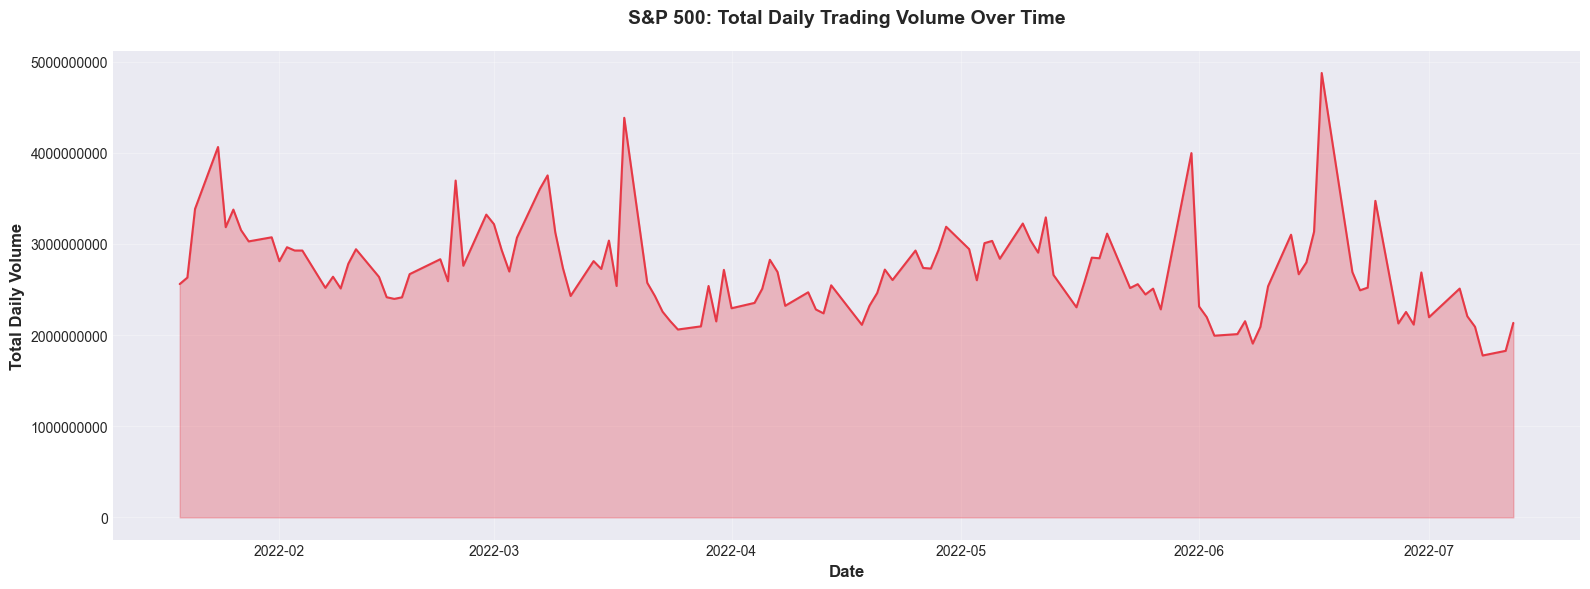

Average daily volume: 2,707,476,080
Max daily volume: 4,875,193,200 on 2022-06-17 00:00:00


In [18]:
# Plot total market volume over time
daily_volume = sp500_combined.groupby('Date')['Volume'].sum().reset_index()

fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(daily_volume['Date'], daily_volume['Volume'], linewidth=1.5, color='#E63946')
ax.fill_between(daily_volume['Date'], daily_volume['Volume'], alpha=0.3, color='#E63946')
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Total Daily Volume', fontsize=12, fontweight='bold')
ax.set_title('S&P 500: Total Daily Trading Volume Over Time', fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)
ax.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.savefig('total_volume_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Average daily volume: {daily_volume['Volume'].mean():,.0f}")
print(f"Max daily volume: {daily_volume['Volume'].max():,.0f} on {daily_volume.loc[daily_volume['Volume'].idxmax(), 'Date']}")

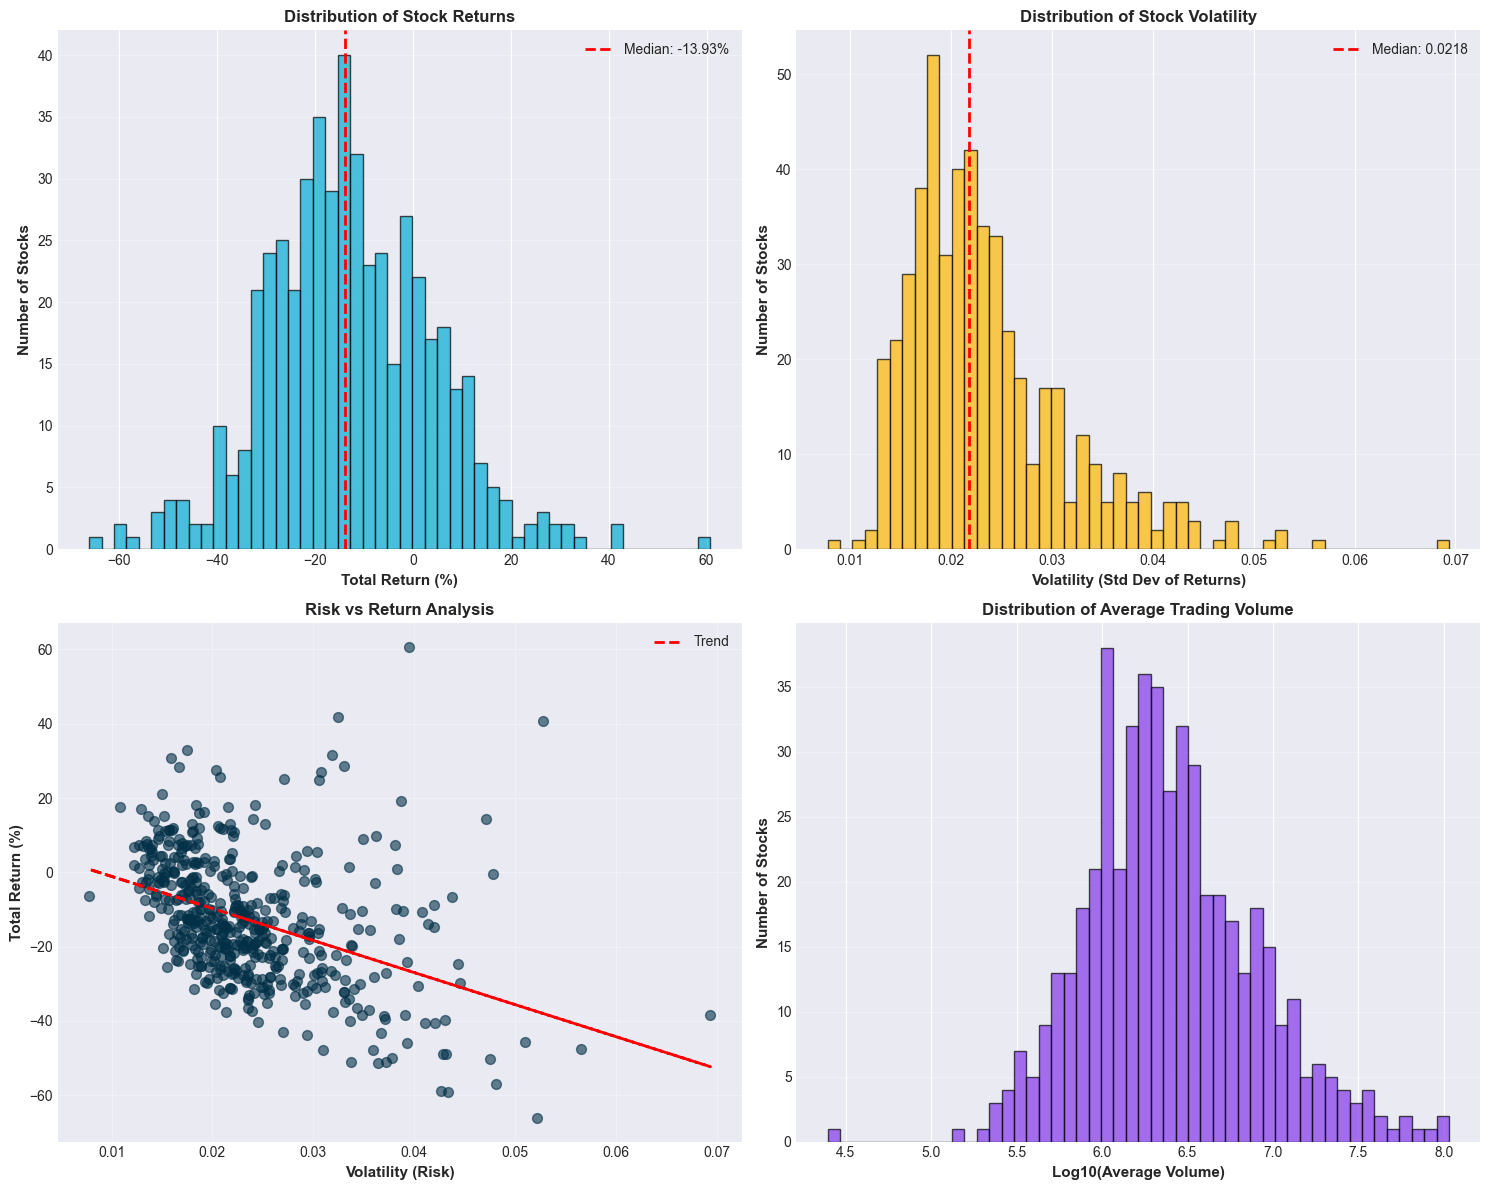

In [19]:
# Distribution plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Total Return Distribution
axes[0, 0].hist(stock_stats_df['Total_Return'], bins=50, edgecolor='black', alpha=0.7, color='#06AED5')
axes[0, 0].set_xlabel('Total Return (%)', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Number of Stocks', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Distribution of Stock Returns', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='y')
axes[0, 0].axvline(stock_stats_df['Total_Return'].median(), color='red', linestyle='--', linewidth=2, label=f"Median: {stock_stats_df['Total_Return'].median():.2f}%")
axes[0, 0].legend()

# Plot 2: Volatility Distribution
axes[0, 1].hist(stock_stats_df['Volatility'], bins=50, edgecolor='black', alpha=0.7, color='#FFB703')
axes[0, 1].set_xlabel('Volatility (Std Dev of Returns)', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Number of Stocks', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Distribution of Stock Volatility', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')
axes[0, 1].axvline(stock_stats_df['Volatility'].median(), color='red', linestyle='--', linewidth=2, label=f"Median: {stock_stats_df['Volatility'].median():.4f}")
axes[0, 1].legend()

# Plot 3: Volatility vs Return Scatter
axes[1, 0].scatter(stock_stats_df['Volatility'], stock_stats_df['Total_Return'], alpha=0.6, s=50, color='#023047')
axes[1, 0].set_xlabel('Volatility (Risk)', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Total Return (%)', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Risk vs Return Analysis', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(stock_stats_df['Volatility'], stock_stats_df['Total_Return'], 1)
p = np.poly1d(z)
axes[1, 0].plot(stock_stats_df['Volatility'], p(stock_stats_df['Volatility']), "r--", linewidth=2, label='Trend')
axes[1, 0].legend()

# Plot 4: Average Volume Distribution (log scale)
axes[1, 1].hist(np.log10(stock_stats_df['Avg_Volume']), bins=50, edgecolor='black', alpha=0.7, color='#8338EC')
axes[1, 1].set_xlabel('Log10(Average Volume)', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Number of Stocks', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Distribution of Average Trading Volume', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('statistical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

## Step 10: Top Performers Visualization

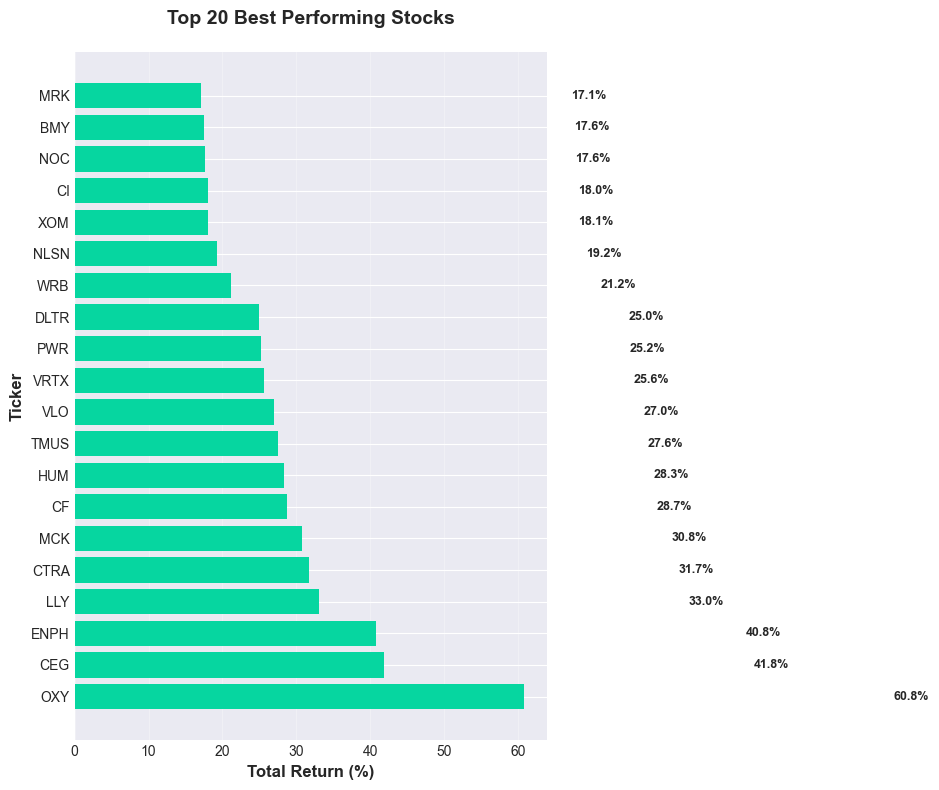

In [20]:
# Top 20 performers
top_20_performers = stock_stats_df.nlargest(20, 'Total_Return')

fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.barh(range(len(top_20_performers)), top_20_performers['Total_Return'], color='#06D6A0')
ax.set_yticks(range(len(top_20_performers)))
ax.set_yticklabels([f"{row['Ticker']}" for _, row in top_20_performers.iterrows()])
ax.set_xlabel('Total Return (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Ticker', fontsize=12, fontweight='bold')
ax.set_title('Top 20 Best Performing Stocks', fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (_, row) in enumerate(top_20_performers.iterrows()):
    ax.text(row['Total_Return'] + 50, i, f"{row['Total_Return']:.1f}%", 
            va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('top_20_performers.png', dpi=300, bbox_inches='tight')
plt.show()

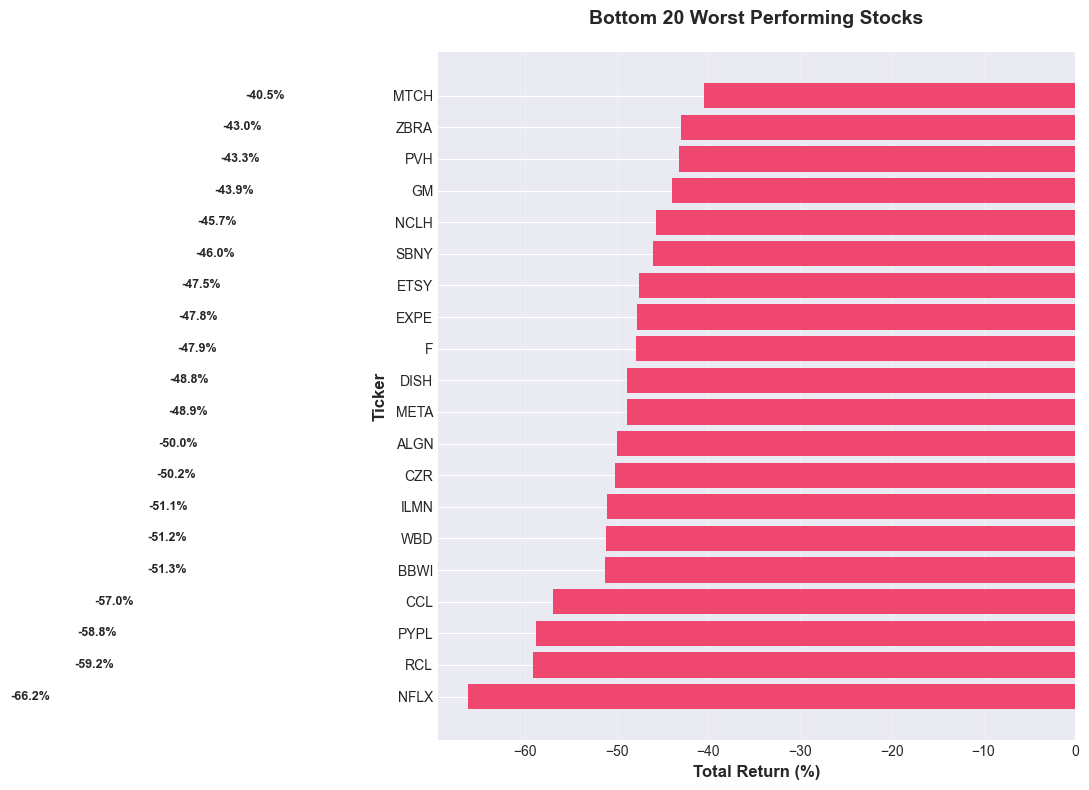

In [21]:
# Bottom 20 performers
bottom_20_performers = stock_stats_df.nsmallest(20, 'Total_Return')

fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.barh(range(len(bottom_20_performers)), bottom_20_performers['Total_Return'], color='#EF476F')
ax.set_yticks(range(len(bottom_20_performers)))
ax.set_yticklabels([f"{row['Ticker']}" for _, row in bottom_20_performers.iterrows()])
ax.set_xlabel('Total Return (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Ticker', fontsize=12, fontweight='bold')
ax.set_title('Bottom 20 Worst Performing Stocks', fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (_, row) in enumerate(bottom_20_performers.iterrows()):
    ax.text(row['Total_Return'] - 50, i, f"{row['Total_Return']:.1f}%", 
            va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('bottom_20_performers.png', dpi=300, bbox_inches='tight')
plt.show()

## Step 11: Summary and Key Insights

In [22]:
print("=" * 80)
print("S&P 500 STOCK DATA ANALYSIS - KEY INSIGHTS")
print("=" * 80)

print(f"\n📊 DATASET OVERVIEW:")
print(f"   • Total number of stocks analyzed: {len(stock_info)}")
print(f"   • Complete data available from: {complete_data_start.strftime('%Y-%m-%d')} to {common_end_date.strftime('%Y-%m-%d')}")
print(f"   • Total trading days in complete dataset: {len(daily_volume):,}")
print(f"   • Total records in combined dataset: {len(sp500_combined):,}")

print(f"\n📈 AGE ANALYSIS:")
print(f"   • Oldest stock: {oldest_stocks.iloc[0]['Ticker']} (started {oldest_stocks.iloc[0]['Start_Date'].strftime('%Y-%m-%d')})")
print(f"   • Youngest stock: {youngest_stocks.iloc[-1]['Ticker']} (started {youngest_stocks.iloc[-1]['Start_Date'].strftime('%Y-%m-%d')})")
print(f"   • Average stock history: {start_dates_df['Years'].mean():.1f} years")

print(f"\n💰 PERFORMANCE METRICS:")
print(f"   • Best performing stock: {top_20_performers.iloc[0]['Ticker']} ({top_20_performers.iloc[0]['Company'][:50]}...)")
print(f"     Return: {top_20_performers.iloc[0]['Total_Return']:.2f}%")
print(f"   • Worst performing stock: {bottom_20_performers.iloc[0]['Ticker']} ({bottom_20_performers.iloc[0]['Company'][:50]}...)")
print(f"     Return: {bottom_20_performers.iloc[0]['Total_Return']:.2f}%")
print(f"   • Median stock return: {stock_stats_df['Total_Return'].median():.2f}%")
print(f"   • Mean stock return: {stock_stats_df['Total_Return'].mean():.2f}%")

print(f"\n📉 VOLATILITY ANALYSIS:")
print(f"   • Most volatile stock: {stock_stats_df.nlargest(1, 'Volatility').iloc[0]['Ticker']}")
print(f"     Volatility: {stock_stats_df['Volatility'].max():.4f}")
print(f"   • Least volatile stock: {stock_stats_df.nsmallest(1, 'Volatility').iloc[0]['Ticker']}")
print(f"     Volatility: {stock_stats_df['Volatility'].min():.4f}")
print(f"   • Average volatility: {stock_stats_df['Volatility'].mean():.4f}")

print(f"\n📦 VOLUME ANALYSIS:")
print(f"   • Average daily market volume: {daily_volume['Volume'].mean():,.0f}")
print(f"   • Highest volume day: {daily_volume.loc[daily_volume['Volume'].idxmax(), 'Date'].strftime('%Y-%m-%d')}")
print(f"     Volume: {daily_volume['Volume'].max():,.0f}")

print(f"\n📁 FILES GENERATED:")
print(f"   ✓ sp500_combined_complete.csv - Combined dataset with all stocks")
print(f"   ✓ ticker_to_company_mapping.json - Ticker to company name mapping")
print(f"   ✓ ticker_to_company_mapping.csv - CSV version of mapping")
print(f"   ✓ companies_over_time.png - Number of companies vs year plot")
print(f"   ✓ stock_start_years_distribution.png - Distribution of start years")
print(f"   ✓ oldest_vs_youngest_stocks.png - Price comparison")
print(f"   ✓ total_volume_over_time.png - Trading volume over time")
print(f"   ✓ statistical_distributions.png - Statistical analysis plots")
print(f"   ✓ top_20_performers.png - Best performing stocks")
print(f"   ✓ bottom_20_performers.png - Worst performing stocks")

print("\n" + "=" * 80)
print("Analysis complete! ✓")
print("=" * 80)

S&P 500 STOCK DATA ANALYSIS - KEY INSIGHTS

📊 DATASET OVERVIEW:
   • Total number of stocks analyzed: 503
   • Complete data available from: 2022-01-19 to 2022-07-12
   • Total trading days in complete dataset: 120
   • Total records in combined dataset: 60,360

📈 AGE ANALYSIS:
   • Oldest stock: PG (started 1962-01-02)
   • Youngest stock: CEG (started 2022-01-19)
   • Average stock history: 32.3 years

💰 PERFORMANCE METRICS:
   • Best performing stock: OXY (Occidental Petroleum Corporation...)
     Return: 60.80%
   • Worst performing stock: NFLX (Netflix Inc....)
     Return: -66.18%
   • Median stock return: -13.93%
   • Mean stock return: -12.82%

📉 VOLATILITY ANALYSIS:
   • Most volatile stock: EPAM
     Volatility: 0.0694
   • Least volatile stock: ATVI
     Volatility: 0.0078
   • Average volatility: 0.0236

📦 VOLUME ANALYSIS:
   • Average daily market volume: 2,707,476,080
   • Highest volume day: 2022-06-17
     Volume: 4,875,193,200

📁 FILES GENERATED:
   ✓ sp500_combined_co